# 原始模型

In [2]:
from keras.datasets import imdb
import numpy as np

In [9]:
# num_words要和dimension一致

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# 标签向量化，asarray将结构数据转换为ndarray，np.asarry会占用新的内存，np.asarray不会

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from keras import layers
from keras import models

In [17]:
original_model = models.Sequential()
original_model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(units=16, activation='relu'))
original_model.add(layers.Dense(units=1, activation='sigmoid'))  # 二分类问题，输出的是一个概率值

In [18]:
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 容量更小的模型

In [25]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(units=4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(units=4, activation='relu'))
smaller_model.add(layers.Dense(units=1, activation='sigmoid'))

In [26]:
smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 训练

In [27]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s - loss: 0.4425 - acc: 0.8205 - val_loss: 0.3354 - val_acc: 0.8782
Epoch 2/20
25000/25000 [==============================] - 11s - loss: 0.2557 - acc: 0.9114 - val_loss: 0.2829 - val_acc: 0.8912
Epoch 3/20
25000/25000 [==============================] - 6s - loss: 0.1979 - acc: 0.9300 - val_loss: 0.2892 - val_acc: 0.8844
Epoch 4/20
25000/25000 [==============================] - 5s - loss: 0.1667 - acc: 0.9402 - val_loss: 0.2929 - val_acc: 0.8843
Epoch 5/20
25000/25000 [==============================] - 5s - loss: 0.1444 - acc: 0.9498 - val_loss: 0.3314 - val_acc: 0.8727
Epoch 6/20
25000/25000 [==============================] - 5s - loss: 0.1250 - acc: 0.9568 - val_loss: 0.3636 - val_acc: 0.8666
Epoch 7/20
25000/25000 [==============================] - 6s - loss: 0.1087 - acc: 0.9629 - val_loss: 0.3531 - val_acc: 0.8734
Epoch 8/20
25000/25000 [==============================] - 6

In [28]:
smaller_model_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s - loss: 0.6040 - acc: 0.7631 - val_loss: 0.5357 - val_acc: 0.8339
Epoch 2/20
25000/25000 [==============================] - 5s - loss: 0.4600 - acc: 0.8724 - val_loss: 0.4254 - val_acc: 0.8684
Epoch 3/20
25000/25000 [==============================] - 5s - loss: 0.3509 - acc: 0.8978 - val_loss: 0.3495 - val_acc: 0.8809
Epoch 4/20
25000/25000 [==============================] - 6s - loss: 0.2780 - acc: 0.9147 - val_loss: 0.3100 - val_acc: 0.8865
Epoch 5/20
25000/25000 [==============================] - 6s - loss: 0.2331 - acc: 0.9256 - val_loss: 0.2905 - val_acc: 0.8884
Epoch 6/20
25000/25000 [==============================] - 6s - loss: 0.2040 - acc: 0.9328 - val_loss: 0.2818 - val_acc: 0.8894
Epoch 7/20
25000/25000 [==============================] - 6s - loss: 0.1829 - acc: 0.9399 - val_loss: 0.2812 - val_acc: 0.8879
Epoch 8/20
25000/25000 [==============================] - 6s 

In [30]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_mdoel_val_loss = smaller_model_hist.history['val_loss']

In [31]:
import matplotlib.pyplot as plt

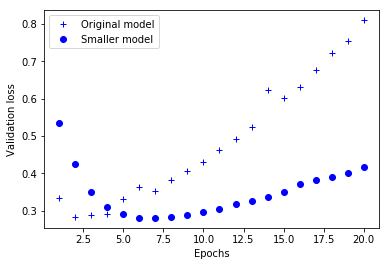

In [32]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_mdoel_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [33]:
# 更小的网络 开始过拟合的时间要晚于参考网络，而且开始过拟合后，它的性能变差的速度也更慢

# 容量更大的模型

In [35]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(units=512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(units=512, activation='relu'))
bigger_model.add(layers.Dense(units=1, activation='sigmoid'))

In [37]:
bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [38]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 25s - loss: 0.4656 - acc: 0.7936 - val_loss: 0.3973 - val_acc: 0.8261
Epoch 2/20
25000/25000 [==============================] - 22s - loss: 0.2201 - acc: 0.9132 - val_loss: 0.2826 - val_acc: 0.8861
Epoch 3/20
25000/25000 [==============================] - 22s - loss: 0.1340 - acc: 0.9508 - val_loss: 0.3274 - val_acc: 0.8828
Epoch 4/20
25000/25000 [==============================] - 23s - loss: 0.0699 - acc: 0.9785 - val_loss: 1.0518 - val_acc: 0.7496
Epoch 5/20
25000/25000 [==============================] - 22s - loss: 0.0630 - acc: 0.9862 - val_loss: 0.4220 - val_acc: 0.8827
Epoch 6/20
25000/25000 [==============================] - 22s - loss: 0.0032 - acc: 0.9997 - val_loss: 0.6788 - val_acc: 0.8809
Epoch 7/20
25000/25000 [==============================] - 23s - loss: 0.0807 - acc: 0.9878 - val_loss: 0.6090 - val_acc: 0.8804
Epoch 8/20
25000/25000 [==============================

In [39]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

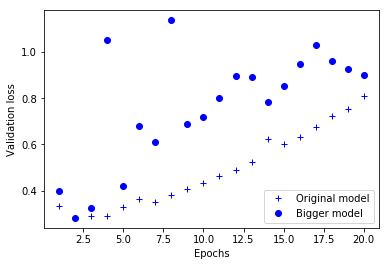

In [40]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [41]:
# 比较训练损失

In [42]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

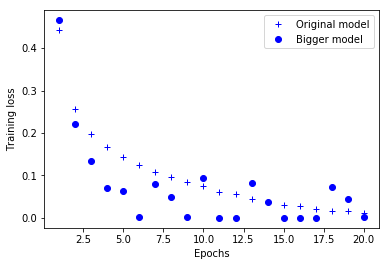

In [43]:
plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

# 添加权重正则化

In [44]:
from keras import regularizers

In [45]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(units=1, activation='sigmoid'))

In [46]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [47]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 11s - loss: 0.4779 - acc: 0.8297 - val_loss: 0.3873 - val_acc: 0.8747
Epoch 2/20
25000/25000 [==============================] - 10s - loss: 0.3125 - acc: 0.9065 - val_loss: 0.3345 - val_acc: 0.8893
Epoch 3/20
25000/25000 [==============================] - 6s - loss: 0.2710 - acc: 0.9196 - val_loss: 0.3337 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 5s - loss: 0.2513 - acc: 0.9276 - val_loss: 0.3388 - val_acc: 0.8862
Epoch 5/20
25000/25000 [==============================] - 5s - loss: 0.2390 - acc: 0.9338 - val_loss: 0.3509 - val_acc: 0.8808
Epoch 6/20
25000/25000 [==============================] - 5s - loss: 0.2308 - acc: 0.9373 - val_loss: 0.3588 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 5s - loss: 0.2237 - acc: 0.9396 - val_loss: 0.3685 - val_acc: 0.8786
Epoch 8/20
25000/25000 [==============================] - 5

In [48]:
l2_model_val_loss = l2_model_hist.history['val_loss']

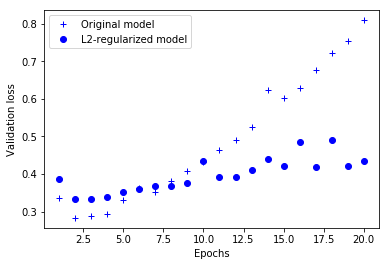

In [49]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

# 向IMDB网络中添加Dropout层

In [54]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(units=16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(units=1, activation='sigmoid'))

In [55]:
dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [57]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 12s - loss: 0.5967 - acc: 0.6829 - val_loss: 0.4478 - val_acc: 0.8605
Epoch 2/20
25000/25000 [==============================] - 6s - loss: 0.4533 - acc: 0.8075 - val_loss: 0.3532 - val_acc: 0.8818
Epoch 3/20
25000/25000 [==============================] - 6s - loss: 0.3623 - acc: 0.8602 - val_loss: 0.2979 - val_acc: 0.8868
Epoch 4/20
25000/25000 [==============================] - 6s - loss: 0.3067 - acc: 0.8901 - val_loss: 0.2782 - val_acc: 0.8894
Epoch 5/20
25000/25000 [==============================] - 6s - loss: 0.2644 - acc: 0.9076 - val_loss: 0.2797 - val_acc: 0.8892
Epoch 6/20
25000/25000 [==============================] - 6s - loss: 0.2379 - acc: 0.9189 - val_loss: 0.2888 - val_acc: 0.8884
Epoch 7/20
25000/25000 [==============================] - 6s - loss: 0.2063 - acc: 0.9299 - val_loss: 0.3129 - val_acc: 0.8836
Epoch 8/20
25000/25000 [==============================] - 6s

In [58]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

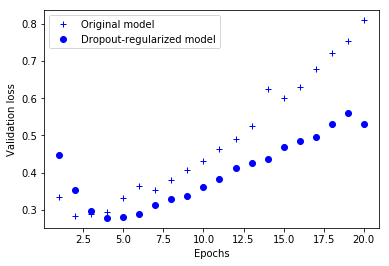

In [59]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()